In [1]:
from ex6 import BuildDataset, get_TS, build_TS, get_approx_pvalue
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


'''
Statistical and Machine Learning Methods in Particle and Astrophysics
TUM - summer term 2019
M. Agostini <matteo.agostini@tum.de> and Hans Niederhausen@tum.de <hans.niederhausen@tum.de>

ex. 6 "Confidence Intervals From Inversion of Likelihood Ratio Hypothesis Tests"

Here we demonstrate that the inversion of likelihood ratio tests guarantuees confidence intervals with
coverage being greater or equal to some specified value.

Steps: 

1) build our toy model (flat bg + gaussian signal), free parameter: p_s (signal fraction)
2) generate "observed" data from the model (for some fixed sample size N)
3) calculate observed TS lambda = -2log L0/L1 for the observe data

4) In order to decide which part of the parameter space [0, 1] is excluded at a given CL (or larger)
    one needs to know the sampling distribution of the TS for each possible point.
    H0: p_s = ps_0 and H1: p_s != ps_0
    The confidence interval (better language would be confidence set) is given by the part 
    of the parameter space that can not be excluded at the desired CL.
    
    We calculate the TS distribution on a grid of possible true values of ps.
    
5) Compare observed TS from step 3) to the TS distributions from step 4) - decide whether or not to reject a given point
   
6) We can verify the coverage of the resulting interval as function of the true value of p_s = ps_0
   Simply generate data for a given ps_0 and calculate in what fraction fo the total number of experiments the true value 
   ps_0 is not contained inside the interval constructed using the method from steps 3-5).
   Observe that coverage is equal to (or greater) to what has been specified (here 68%).
   
7) How does this depend on the sample size? repeat steps 1)-6) for different sample sizes. 
'''

'\nStatistical and Machine Learning Methods in Particle and Astrophysics\nTUM - summer term 2019\nM. Agostini <matteo.agostini@tum.de> and Hans Niederhausen@tum.de <hans.niederhausen@tum.de>\n\nex. 6 "Confidence Intervals From Inversion of Likelihood Ratio Hypothesis Tests"\n\nHere we demonstrate that the inversion of likelihood ratio tests guarantuees confidence intervals with\ncoverage being greater or equal to some specified value.\n\nSteps: \n\n1) build our toy model (flat bg + gaussian signal), free parameter: p_s (signal fraction)\n2) generate "observed" data from the model (for some fixed sample size N)\n3) calculate observed TS lambda = -2log L0/L1 for the observe data\n\n4) In order to decide which part of the parameter space [0, 1] is excluded at a given CL (or larger)\n    one needs to know the sampling distribution of the TS for each possible point.\n    H0: p_s = ps_0 and H1: p_s != ps_0\n    The confidence interval (better language would be confidence set) is given by the

observed data:
[14.92447907 14.7902736  12.0899809 ]
TS-value at true parameter value: 0.9335977082664719


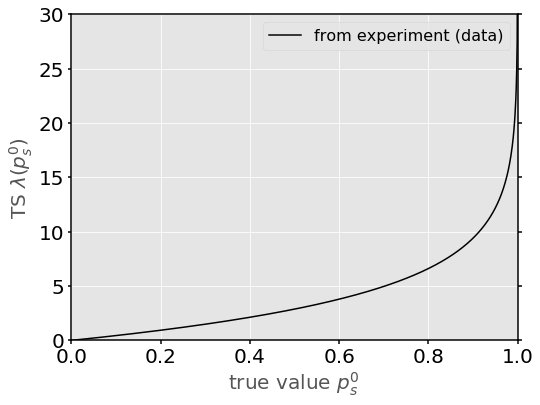

<Figure size 432x288 with 0 Axes>

In [2]:
'''
steps 1-3: generating observed data for some true parameter value
'''

ps_true = 0.2
sample_size = 3

# generate random data
tx = BuildDataset(sample_size, ps_true)
obsts = get_TS(tx, ps_true)
print "observed data:"
print tx
print "TS-value at true parameter value:", obsts

# lets plot the observed TS value as function of the (unknown) true parameter value
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
xvals = np.linspace(0,1,1000)
yvals = [get_TS(tx, ps) for ps in xvals]
plt.plot(xvals, yvals, "k-", label="from experiment (data)")
ax.set_ylabel('TS $\lambda(p_s^0)$', fontsize=20)
ax.set_xlabel('true value $p_s^0$', fontsize=20)
for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(1.5)
          ax.spines[axis].set_color('0.0')
    
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
ax.yaxis.set_ticks_position('both')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 30])
plt.legend(fontsize=16)

plt.show()
plt.clf()

In [3]:
# the best fit is the parameter value with the smallest TS
# this is identical to the MLE by construction

idx = np.argmin(yvals)
ps_best = xvals[idx]
print ps_best

0.0


In [4]:
'''
step 4: obtain the TS distributions for each point in parameter space 
'''

ps_edges = np.linspace(0.0,1.0,101)
ps_grid = 0.5*(ps_edges[1:]+ps_edges[:-1])
TS_grid = []

counter = 0
for ps in ps_grid:
    if counter%10==0:
        print counter*1.0 / len(ps_grid)
    ts = build_TS(ps, 10000, sample_size)
    TS_grid.append(ts)
    counter+=1
    

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [5]:
# also calculate the observed TS on each of these grid points (for which we calculate the TS distribution)
obsts_grid = [get_TS(tx, ps) for ps in ps_grid]
# this can now be turned into a p-value corresponding to the hypothesis test H0:ps = ps0 H1: ps!=ps0
pvals_grid = [get_approx_pvalue(ts, obsts) for ts, obsts in zip(TS_grid, obsts_grid)]

signal prob: 0.005 pvalue 0.99


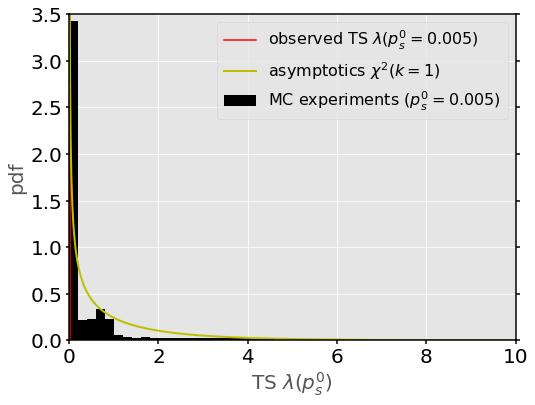

signal prob: 0.015 pvalue 0.8878


<Figure size 432x288 with 0 Axes>

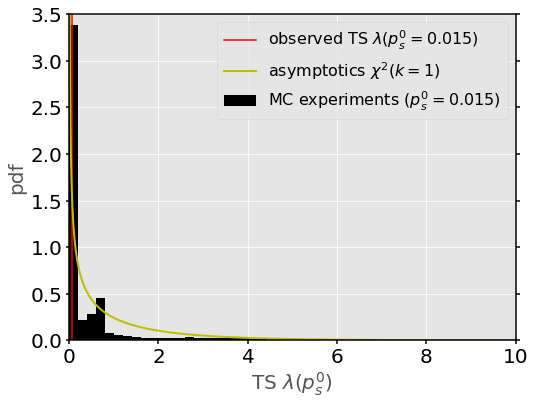

signal prob: 0.025 pvalue 0.8555


<Figure size 432x288 with 0 Axes>

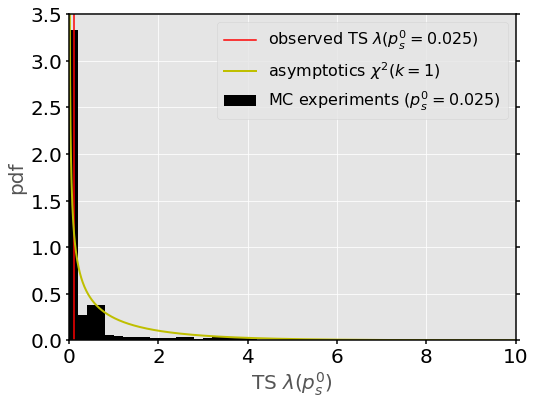

signal prob: 0.035 pvalue 0.822


<Figure size 432x288 with 0 Axes>

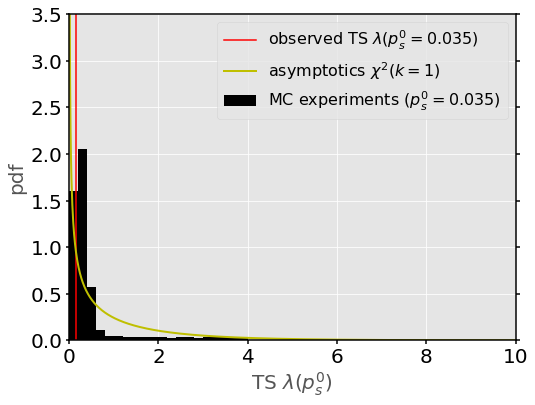

signal prob: 0.045 pvalue 0.7993


<Figure size 432x288 with 0 Axes>

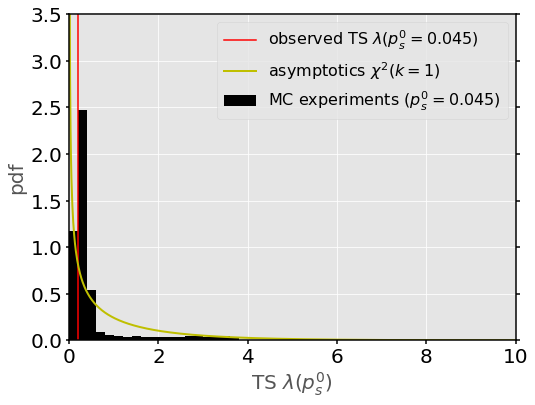

signal prob: 0.055 pvalue 0.7753


<Figure size 432x288 with 0 Axes>

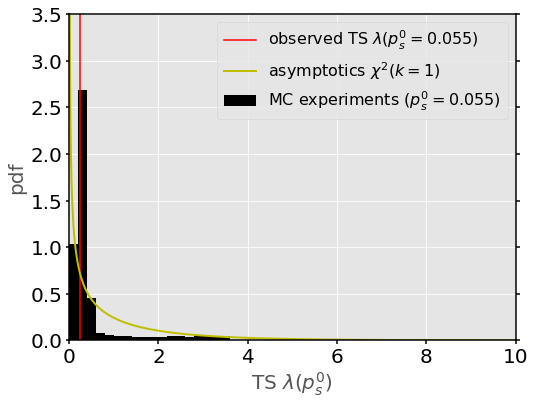

signal prob: 0.065 pvalue 0.7343


<Figure size 432x288 with 0 Axes>

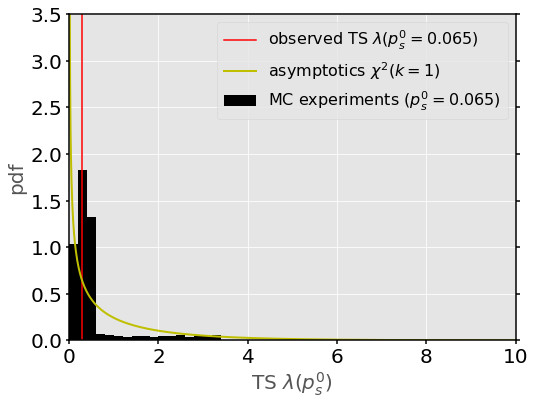

signal prob: 0.07500000000000001 pvalue 0.6669


<Figure size 432x288 with 0 Axes>

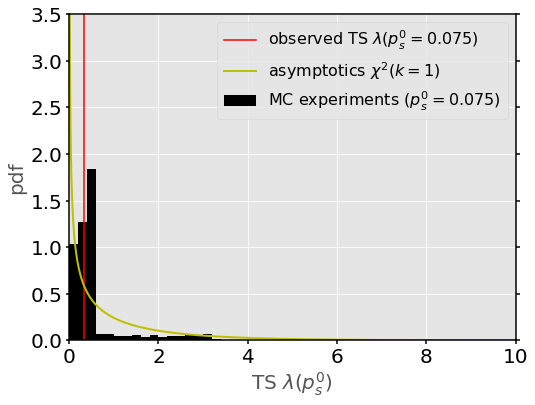

signal prob: 0.08499999999999999 pvalue 0.5959


<Figure size 432x288 with 0 Axes>

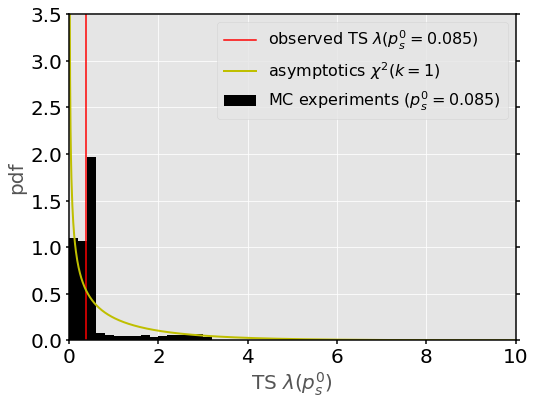

signal prob: 0.095 pvalue 0.5759


<Figure size 432x288 with 0 Axes>

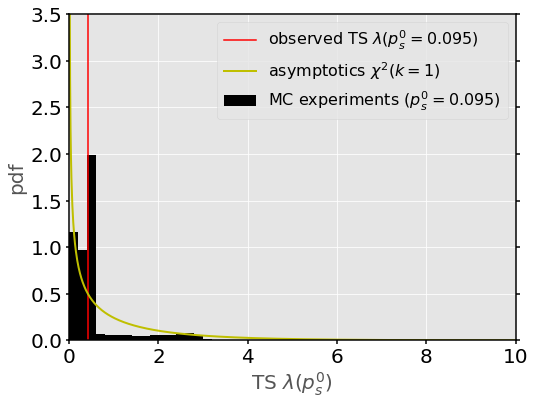

signal prob: 0.10500000000000001 pvalue 0.5532


<Figure size 432x288 with 0 Axes>

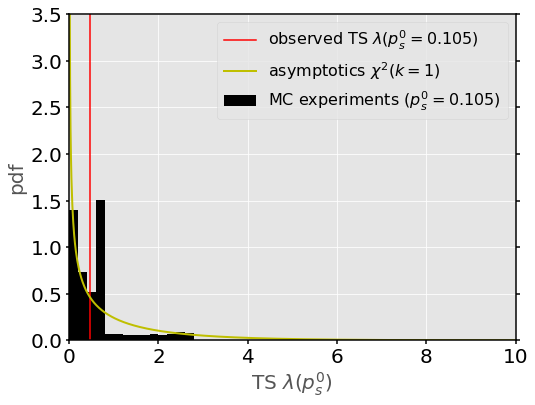

signal prob: 0.11499999999999999 pvalue 0.5462


<Figure size 432x288 with 0 Axes>

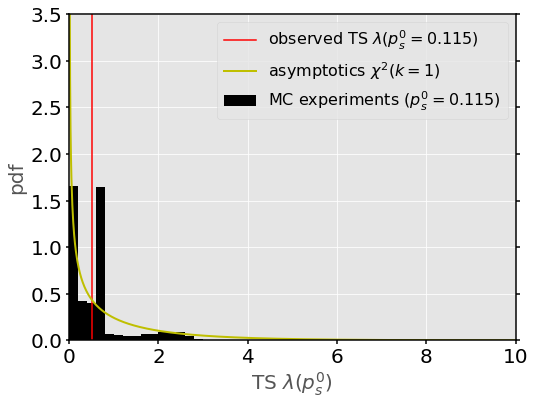

signal prob: 0.125 pvalue 0.5348


<Figure size 432x288 with 0 Axes>

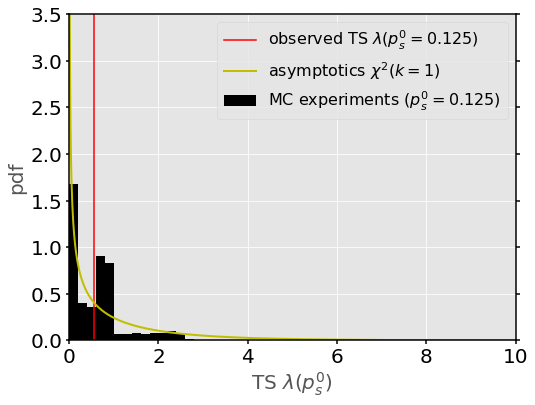

signal prob: 0.135 pvalue 0.5419


<Figure size 432x288 with 0 Axes>

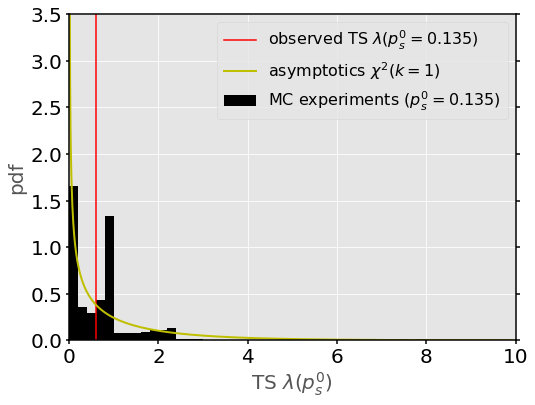

signal prob: 0.14500000000000002 pvalue 0.5182


<Figure size 432x288 with 0 Axes>

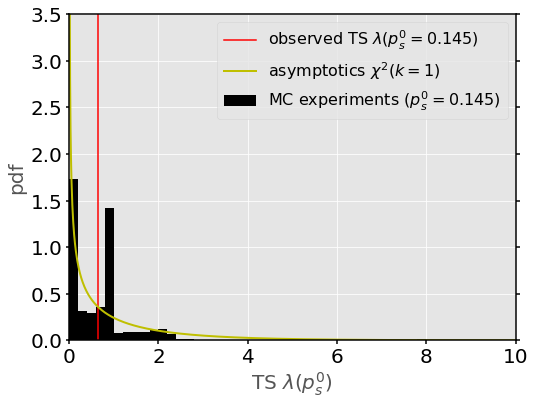

signal prob: 0.155 pvalue 0.5084


<Figure size 432x288 with 0 Axes>

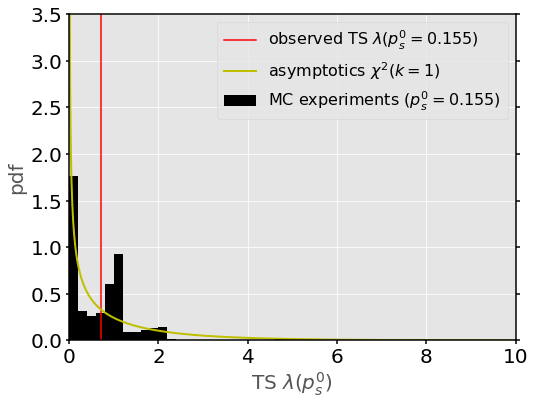

signal prob: 0.165 pvalue 0.5082


<Figure size 432x288 with 0 Axes>

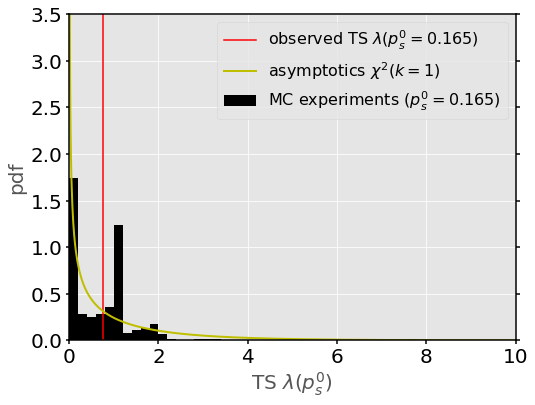

signal prob: 0.175 pvalue 0.4928


<Figure size 432x288 with 0 Axes>

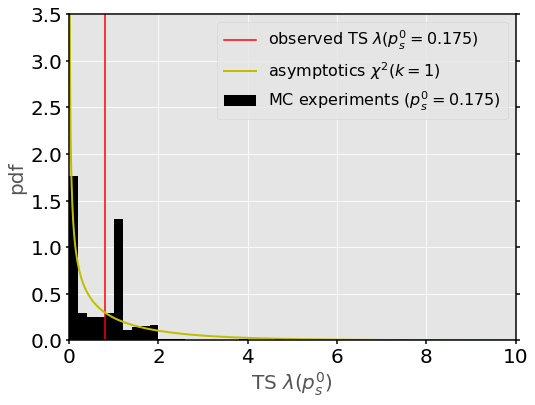

signal prob: 0.185 pvalue 0.4928


<Figure size 432x288 with 0 Axes>

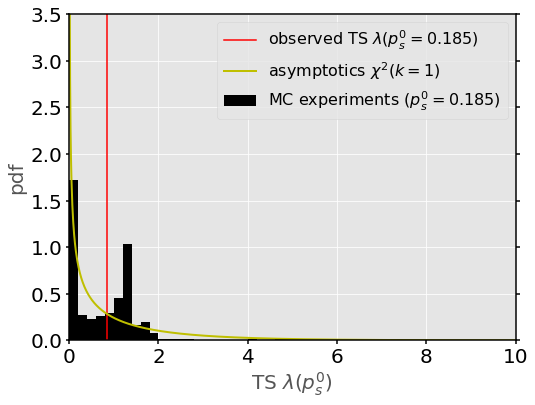

signal prob: 0.195 pvalue 0.4613


<Figure size 432x288 with 0 Axes>

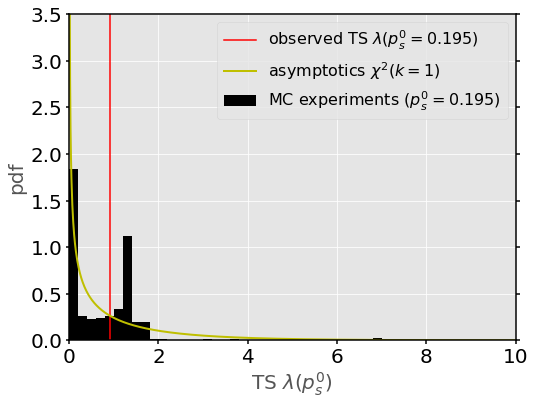

signal prob: 0.20500000000000002 pvalue 0.4562


<Figure size 432x288 with 0 Axes>

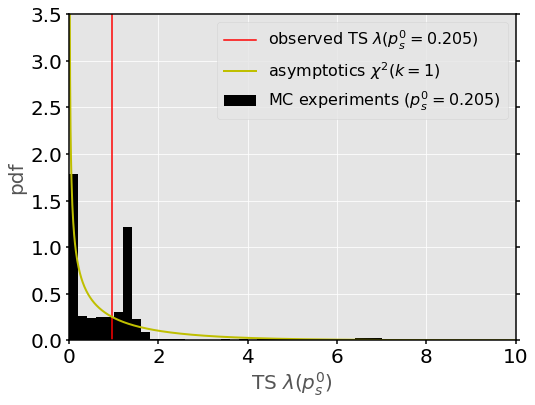

signal prob: 0.215 pvalue 0.4508


<Figure size 432x288 with 0 Axes>

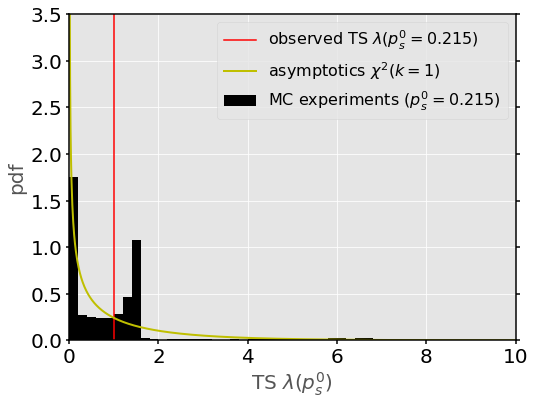

signal prob: 0.225 pvalue 0.4291


<Figure size 432x288 with 0 Axes>

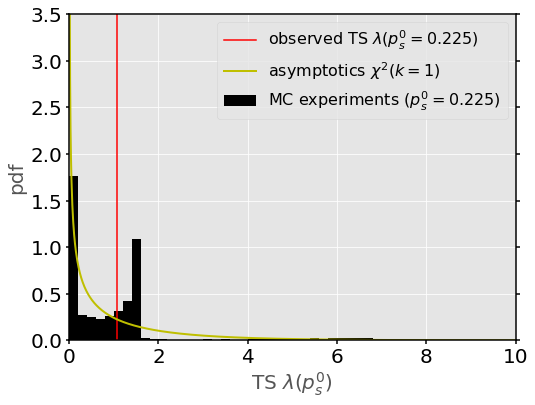

signal prob: 0.235 pvalue 0.4152


<Figure size 432x288 with 0 Axes>

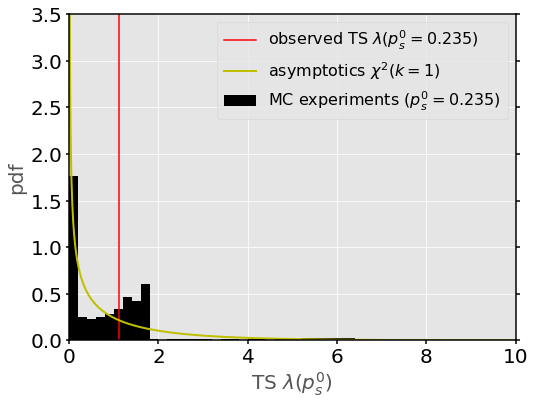

signal prob: 0.245 pvalue 0.3751


<Figure size 432x288 with 0 Axes>

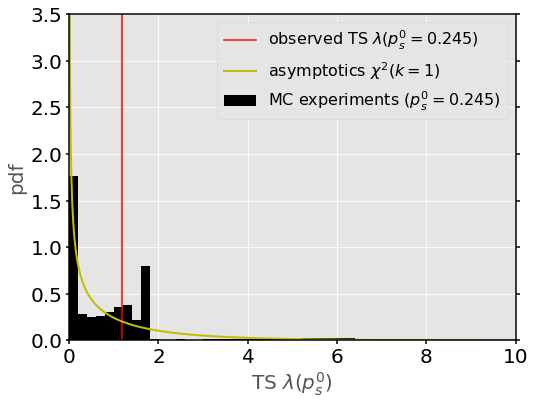

signal prob: 0.255 pvalue 0.3309


<Figure size 432x288 with 0 Axes>

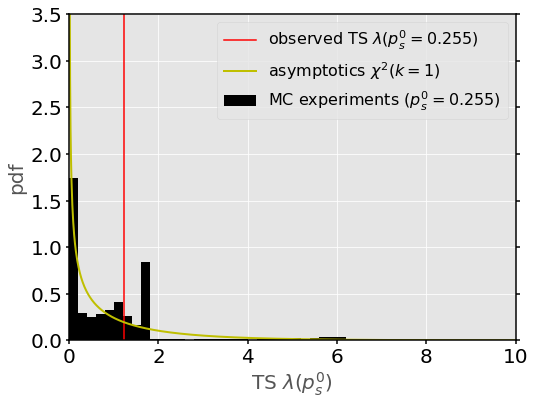

signal prob: 0.265 pvalue 0.3024


<Figure size 432x288 with 0 Axes>

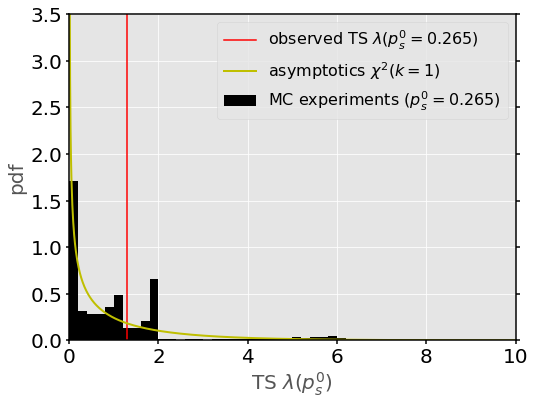

signal prob: 0.275 pvalue 0.2875


<Figure size 432x288 with 0 Axes>

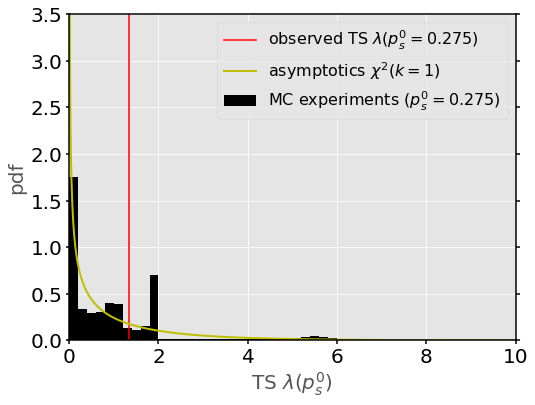

signal prob: 0.28500000000000003 pvalue 0.297


<Figure size 432x288 with 0 Axes>

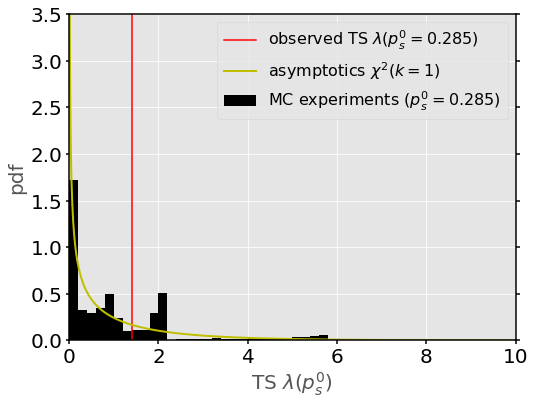

signal prob: 0.295 pvalue 0.2956


<Figure size 432x288 with 0 Axes>

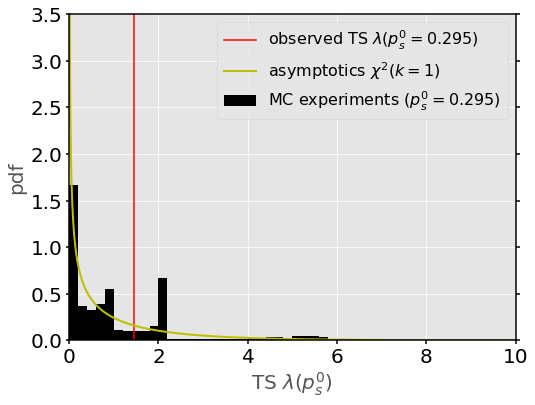

signal prob: 0.305 pvalue 0.2784


<Figure size 432x288 with 0 Axes>

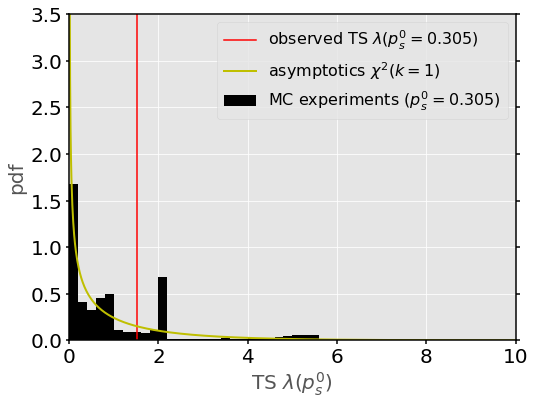

signal prob: 0.315 pvalue 0.2719


<Figure size 432x288 with 0 Axes>

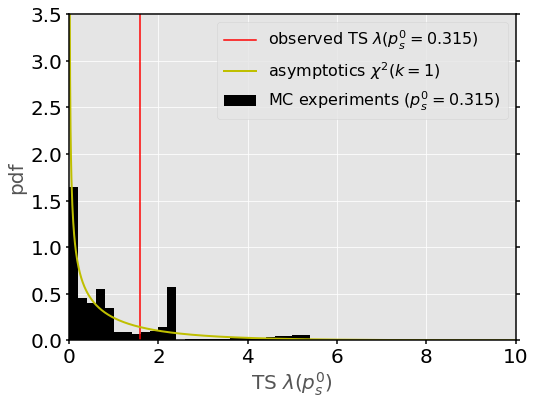

signal prob: 0.325 pvalue 0.2737


<Figure size 432x288 with 0 Axes>

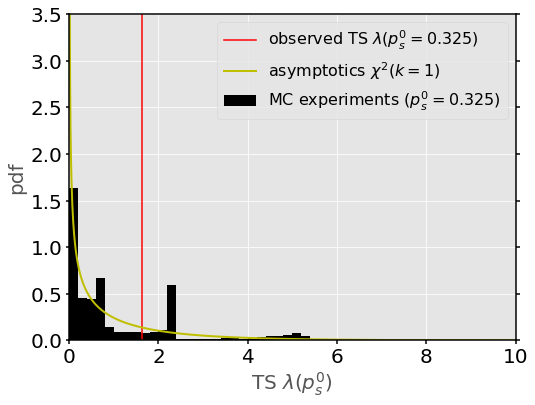

signal prob: 0.335 pvalue 0.2672


<Figure size 432x288 with 0 Axes>

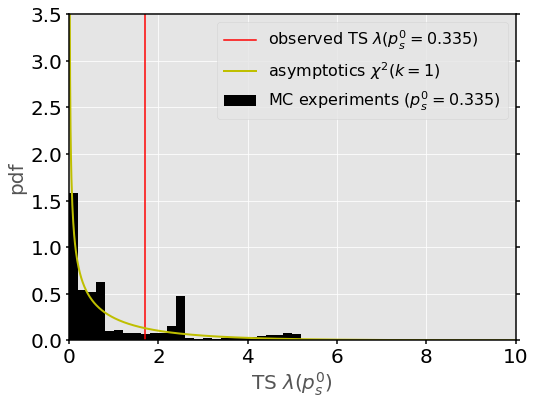

signal prob: 0.34500000000000003 pvalue 0.2617


<Figure size 432x288 with 0 Axes>

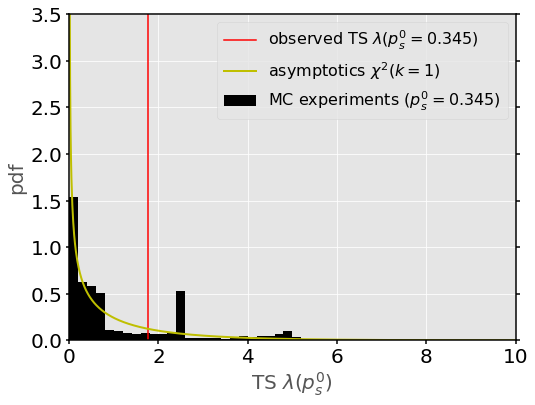

signal prob: 0.355 pvalue 0.27


<Figure size 432x288 with 0 Axes>

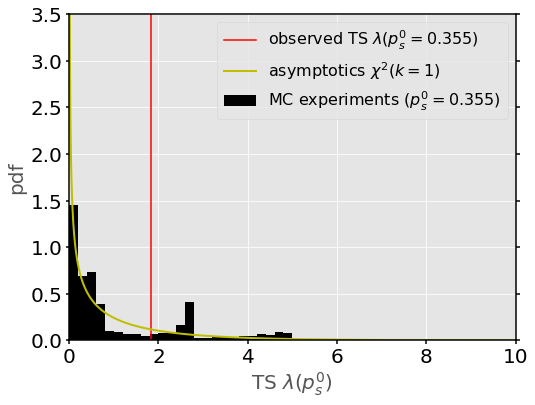

signal prob: 0.365 pvalue 0.2672


<Figure size 432x288 with 0 Axes>

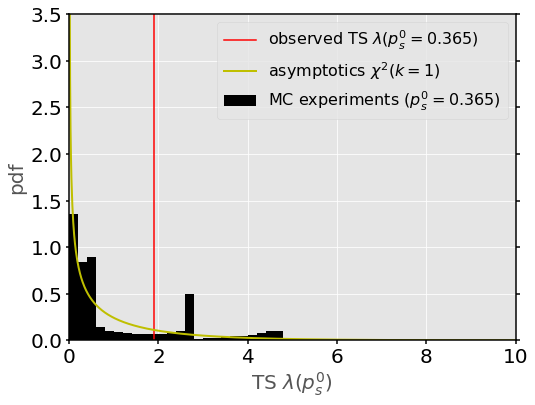

signal prob: 0.375 pvalue 0.2629


<Figure size 432x288 with 0 Axes>

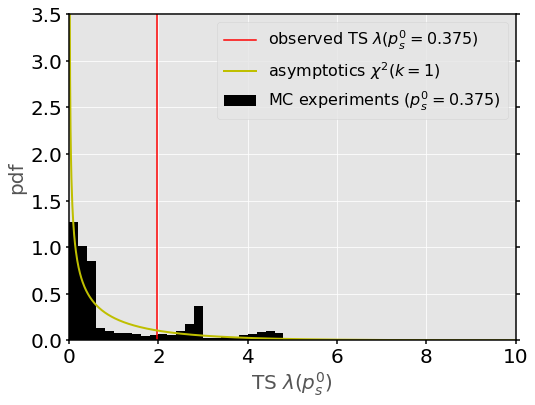

signal prob: 0.385 pvalue 0.2538


<Figure size 432x288 with 0 Axes>

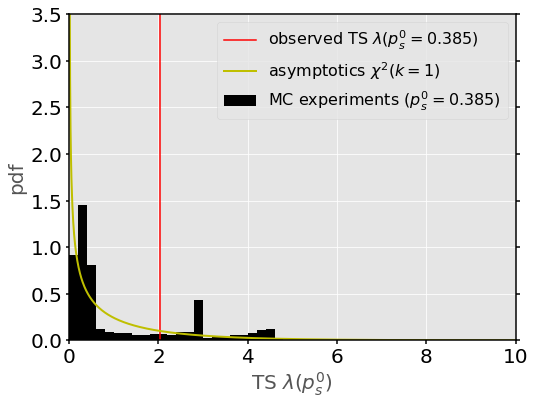

signal prob: 0.395 pvalue 0.2597


<Figure size 432x288 with 0 Axes>

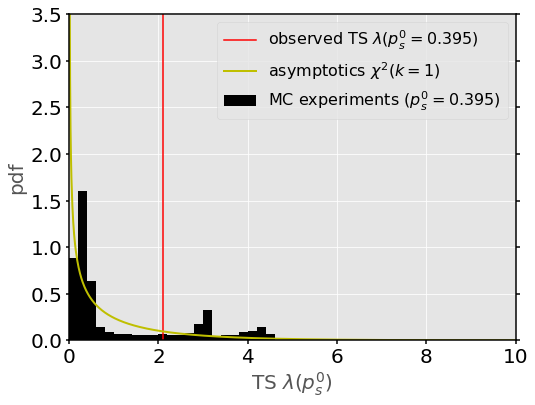

signal prob: 0.405 pvalue 0.2506


<Figure size 432x288 with 0 Axes>

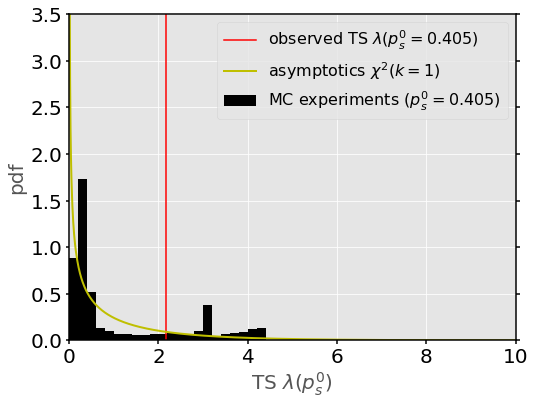

signal prob: 0.41500000000000004 pvalue 0.2498


<Figure size 432x288 with 0 Axes>

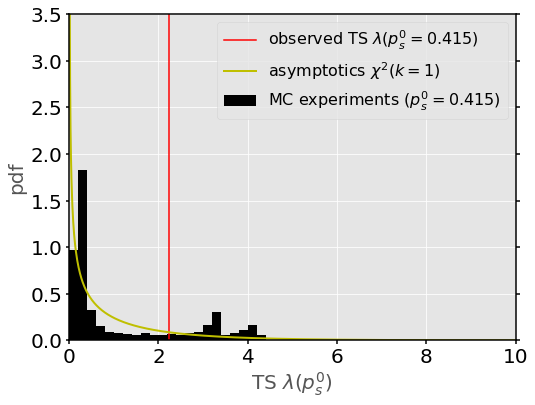

signal prob: 0.425 pvalue 0.2537


<Figure size 432x288 with 0 Axes>

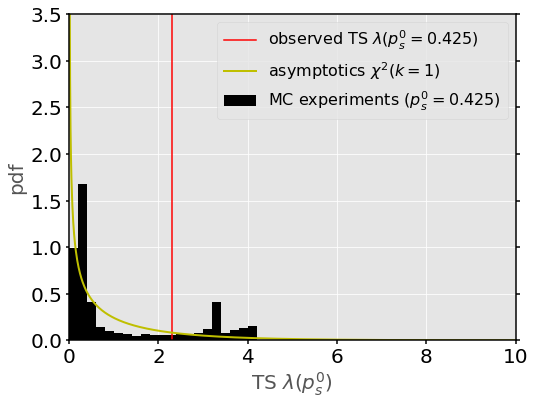

signal prob: 0.435 pvalue 0.2529


<Figure size 432x288 with 0 Axes>

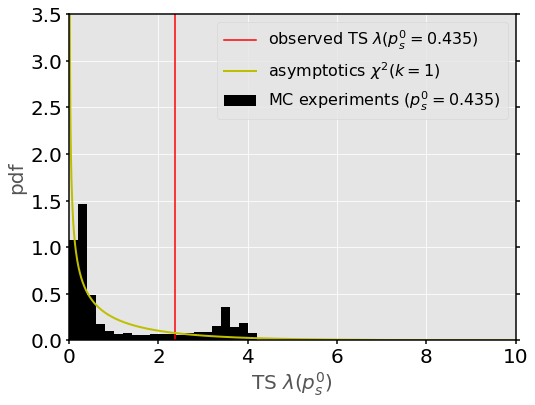

signal prob: 0.445 pvalue 0.2458


<Figure size 432x288 with 0 Axes>

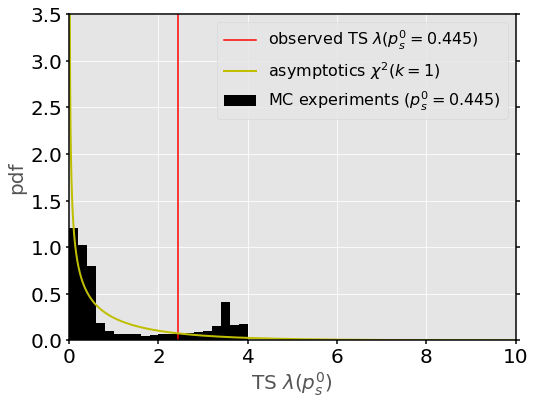

signal prob: 0.455 pvalue 0.2412


<Figure size 432x288 with 0 Axes>

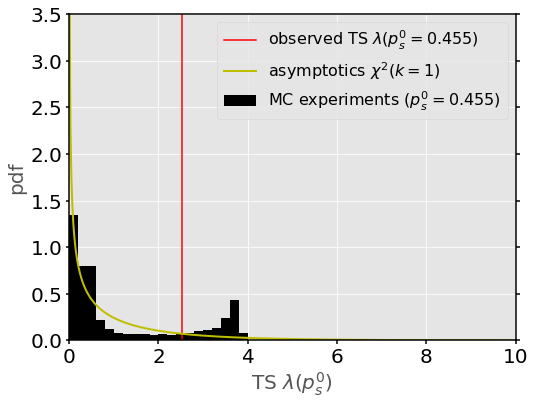

signal prob: 0.465 pvalue 0.2312


<Figure size 432x288 with 0 Axes>

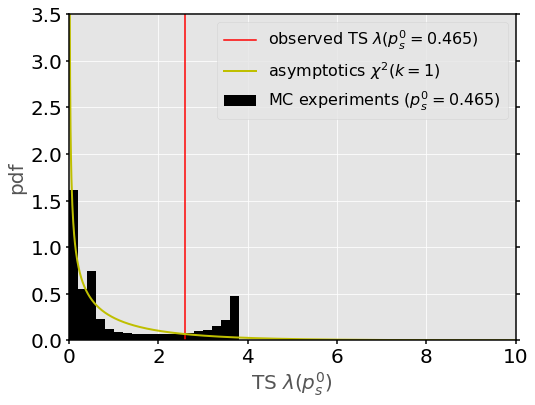

signal prob: 0.475 pvalue 0.2244


<Figure size 432x288 with 0 Axes>

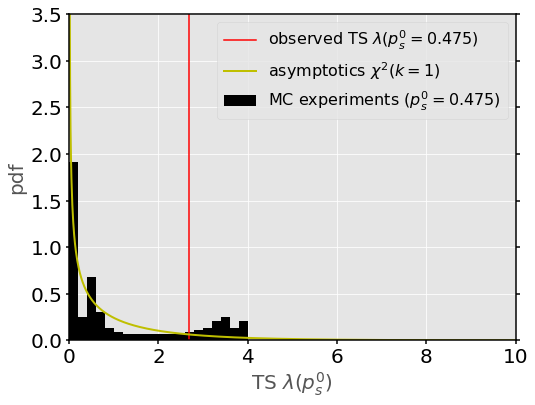

signal prob: 0.485 pvalue 0.2201


<Figure size 432x288 with 0 Axes>

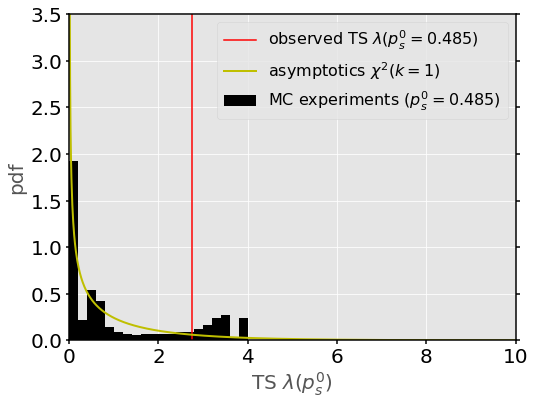

signal prob: 0.495 pvalue 0.2098


<Figure size 432x288 with 0 Axes>

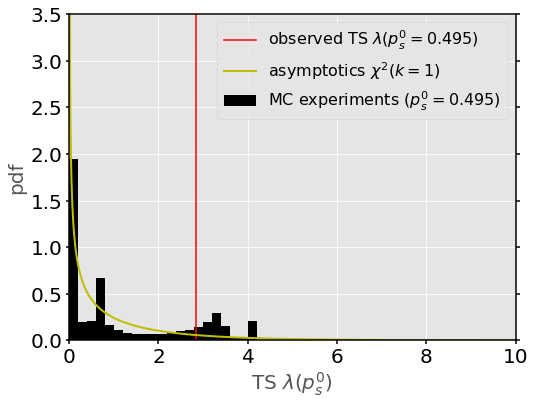

signal prob: 0.505 pvalue 0.1925


<Figure size 432x288 with 0 Axes>

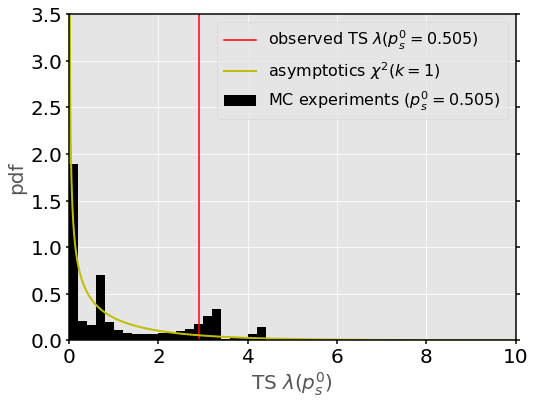

signal prob: 0.515 pvalue 0.1643


<Figure size 432x288 with 0 Axes>

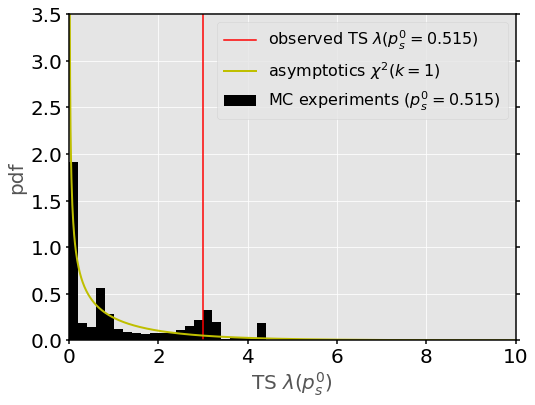

signal prob: 0.525 pvalue 0.117


<Figure size 432x288 with 0 Axes>

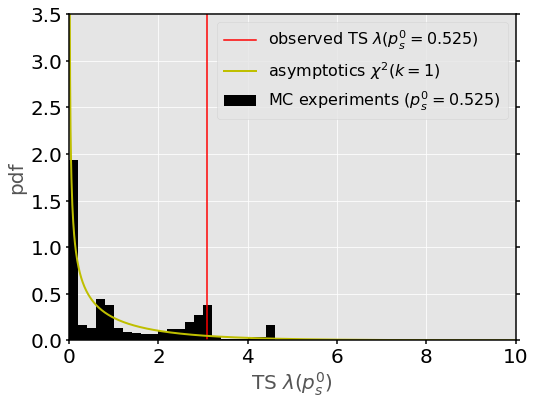

signal prob: 0.535 pvalue 0.0542


<Figure size 432x288 with 0 Axes>

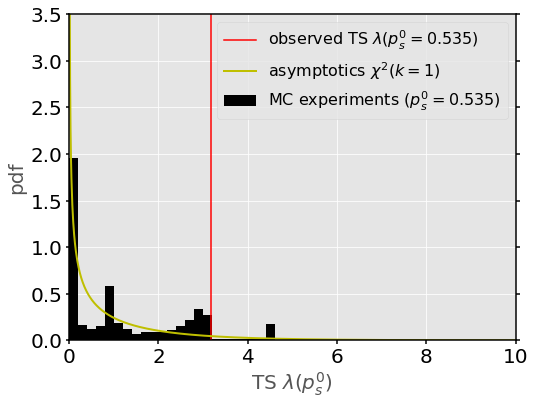

signal prob: 0.545 pvalue 0.0529


<Figure size 432x288 with 0 Axes>

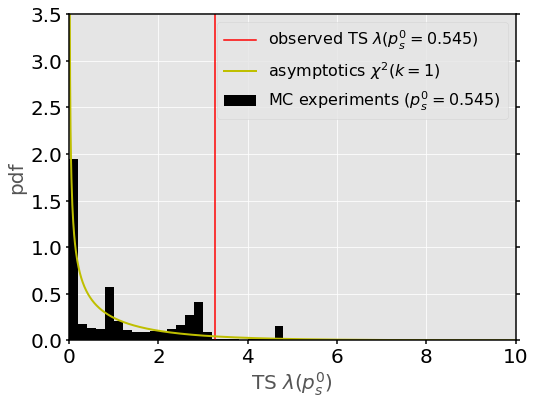

signal prob: 0.555 pvalue 0.0477


<Figure size 432x288 with 0 Axes>

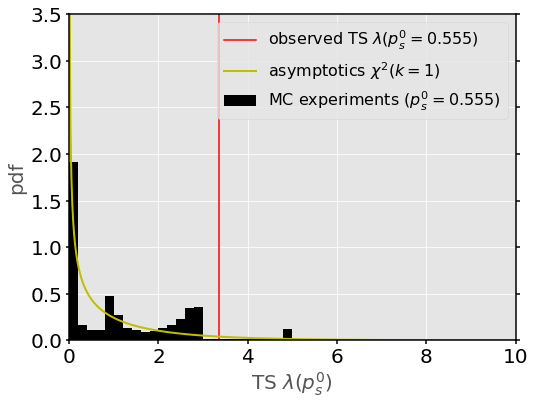

signal prob: 0.5650000000000001 pvalue 0.0483


<Figure size 432x288 with 0 Axes>

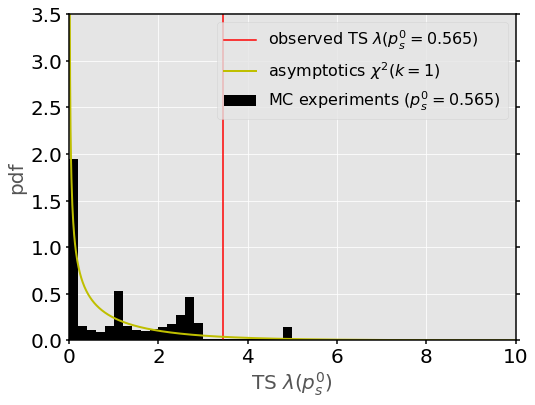

signal prob: 0.575 pvalue 0.0439


<Figure size 432x288 with 0 Axes>

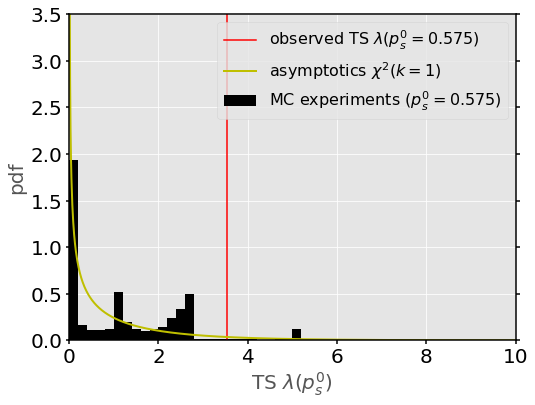

signal prob: 0.585 pvalue 0.0385


<Figure size 432x288 with 0 Axes>

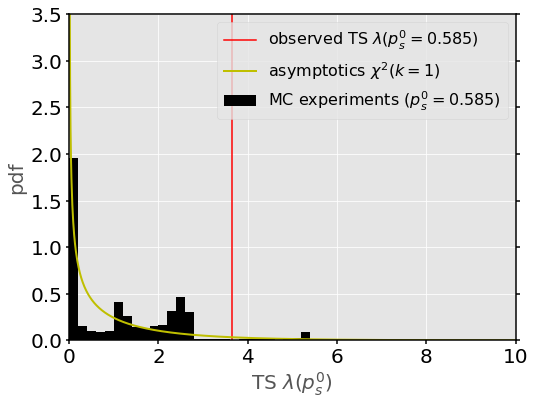

signal prob: 0.595 pvalue 0.0389


<Figure size 432x288 with 0 Axes>

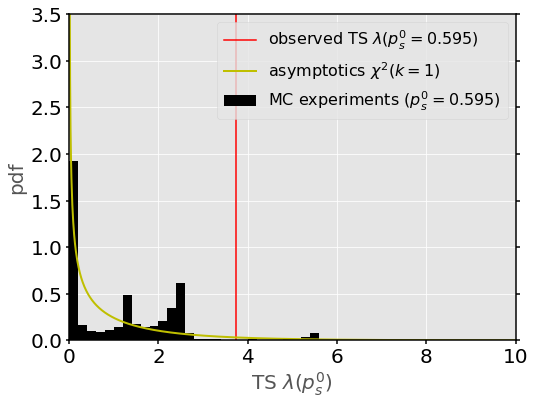

signal prob: 0.605 pvalue 0.036


<Figure size 432x288 with 0 Axes>

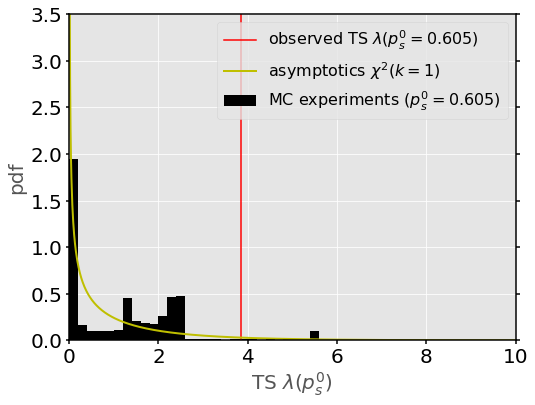

signal prob: 0.615 pvalue 0.0329


<Figure size 432x288 with 0 Axes>

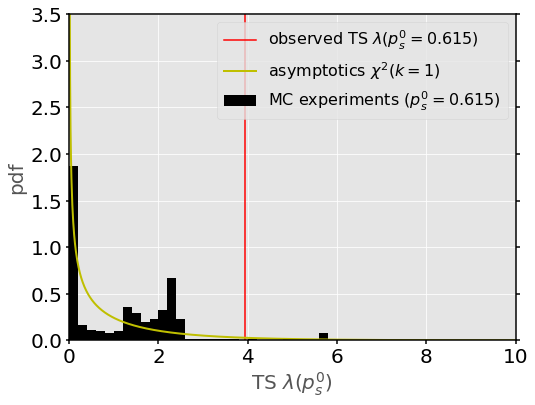

signal prob: 0.625 pvalue 0.0293


<Figure size 432x288 with 0 Axes>

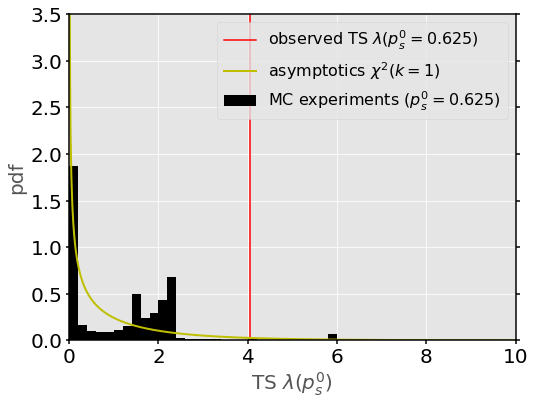

signal prob: 0.635 pvalue 0.0285


<Figure size 432x288 with 0 Axes>

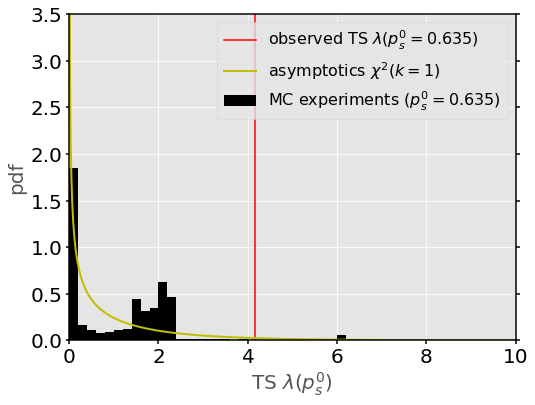

signal prob: 0.645 pvalue 0.0287


<Figure size 432x288 with 0 Axes>

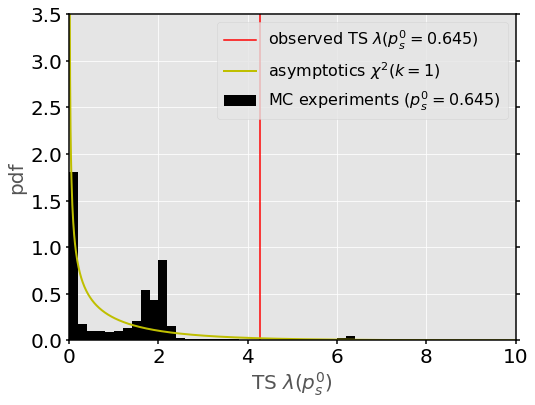

signal prob: 0.655 pvalue 0.0242


<Figure size 432x288 with 0 Axes>

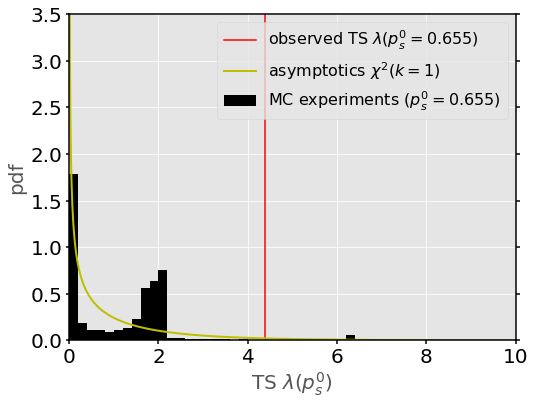

signal prob: 0.665 pvalue 0.0221


<Figure size 432x288 with 0 Axes>

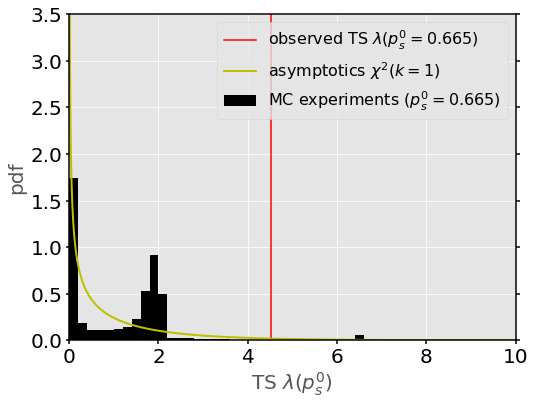

signal prob: 0.675 pvalue 0.0213


<Figure size 432x288 with 0 Axes>

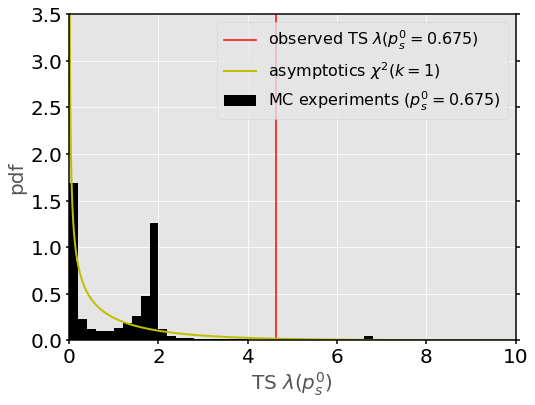

signal prob: 0.685 pvalue 0.0212


<Figure size 432x288 with 0 Axes>

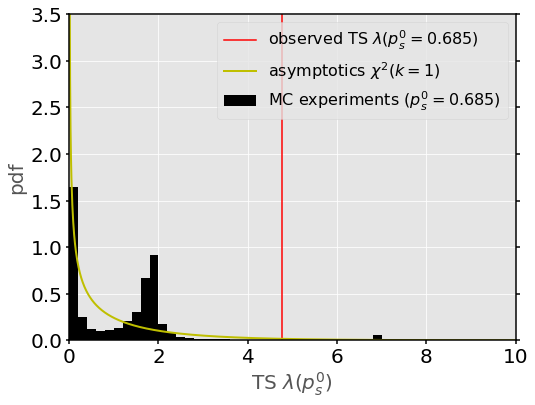

signal prob: 0.6950000000000001 pvalue 0.0151


<Figure size 432x288 with 0 Axes>

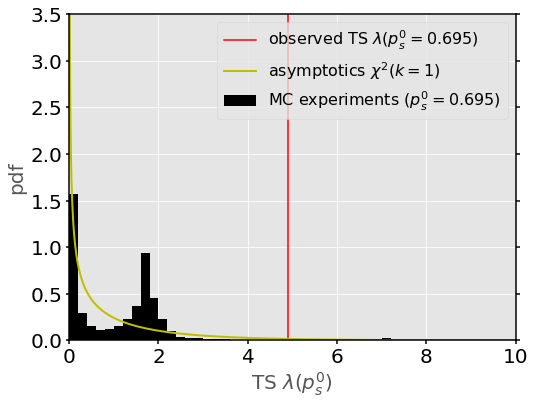

signal prob: 0.7050000000000001 pvalue 0.0158


<Figure size 432x288 with 0 Axes>

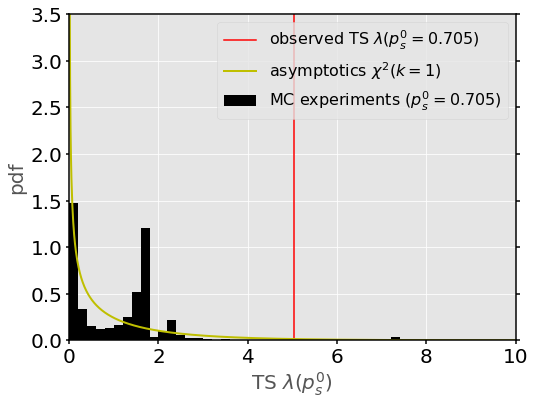

signal prob: 0.715 pvalue 0.0148


<Figure size 432x288 with 0 Axes>

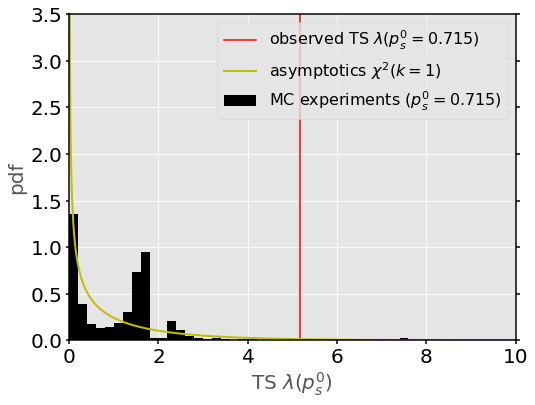

signal prob: 0.725 pvalue 0.0151


<Figure size 432x288 with 0 Axes>

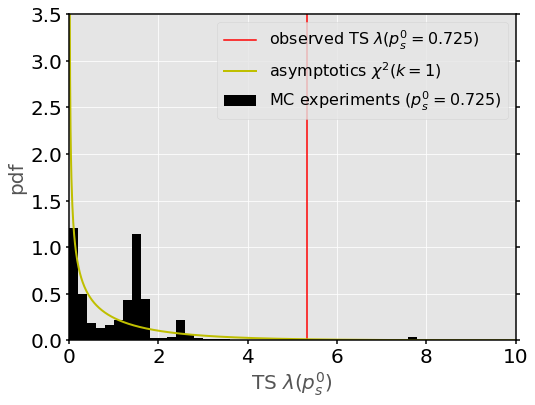

signal prob: 0.735 pvalue 0.011


<Figure size 432x288 with 0 Axes>

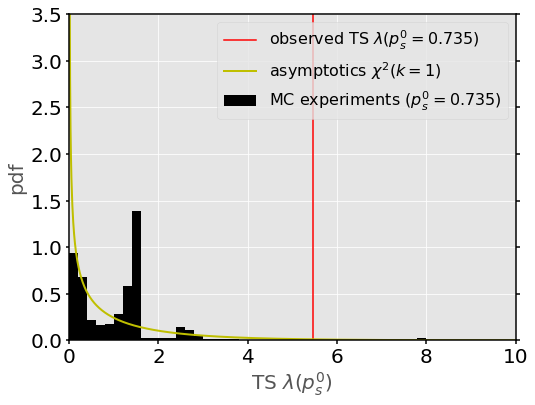

signal prob: 0.745 pvalue 0.0108


<Figure size 432x288 with 0 Axes>

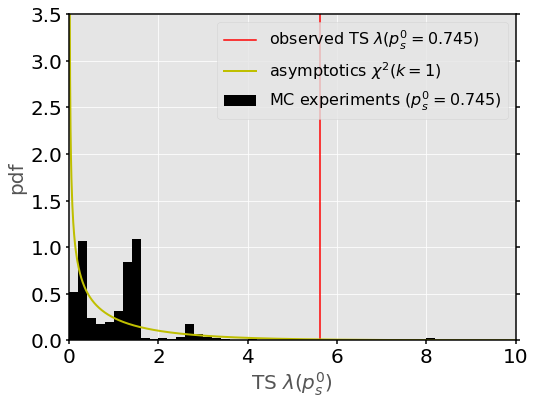

signal prob: 0.755 pvalue 0.0089


<Figure size 432x288 with 0 Axes>

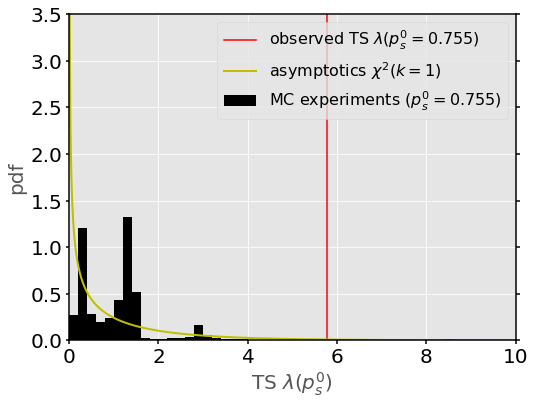

signal prob: 0.765 pvalue 0.0089


<Figure size 432x288 with 0 Axes>

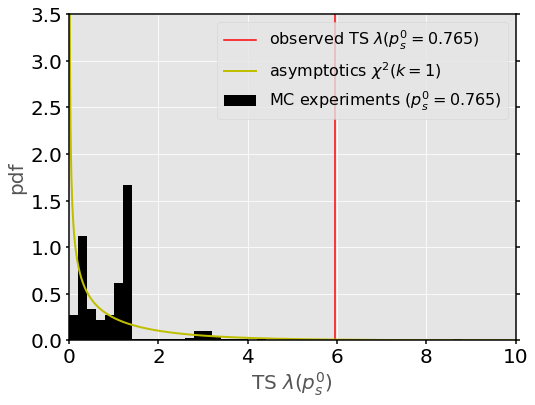

signal prob: 0.775 pvalue 0.0083


<Figure size 432x288 with 0 Axes>

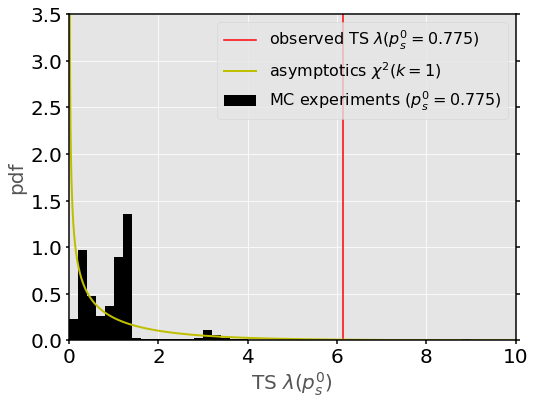

signal prob: 0.785 pvalue 0.0066


<Figure size 432x288 with 0 Axes>

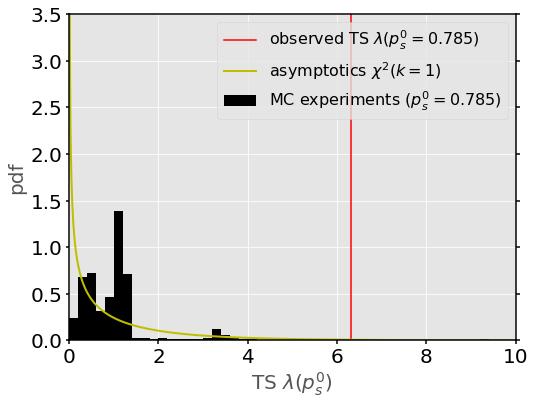

signal prob: 0.795 pvalue 0.0048


<Figure size 432x288 with 0 Axes>

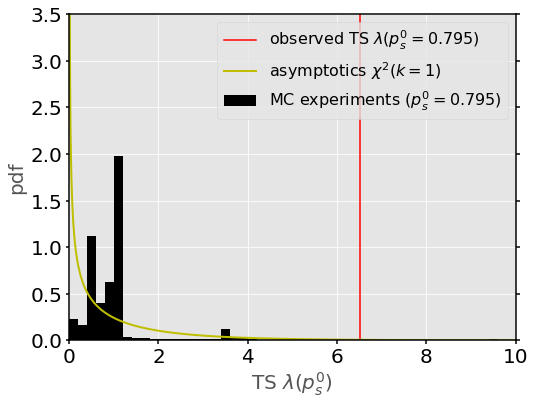

signal prob: 0.805 pvalue 0.0039


<Figure size 432x288 with 0 Axes>

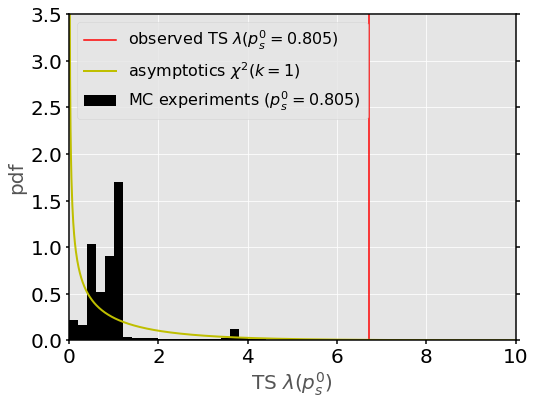

signal prob: 0.8150000000000001 pvalue 0.0052


<Figure size 432x288 with 0 Axes>

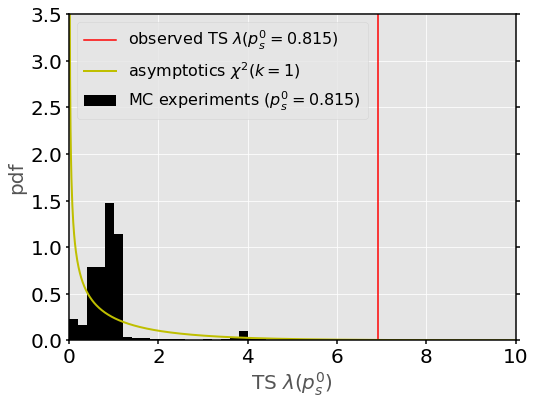

signal prob: 0.8250000000000001 pvalue 0.0037


<Figure size 432x288 with 0 Axes>

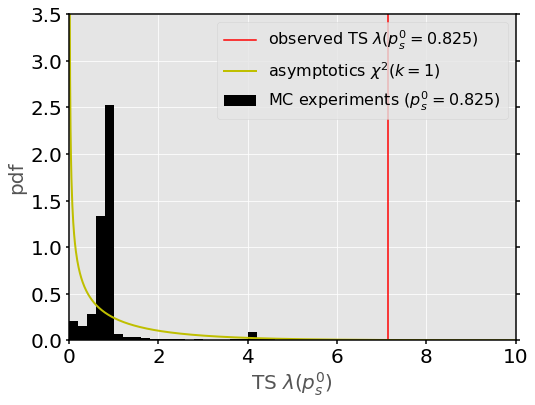

signal prob: 0.835 pvalue 0.0032


<Figure size 432x288 with 0 Axes>

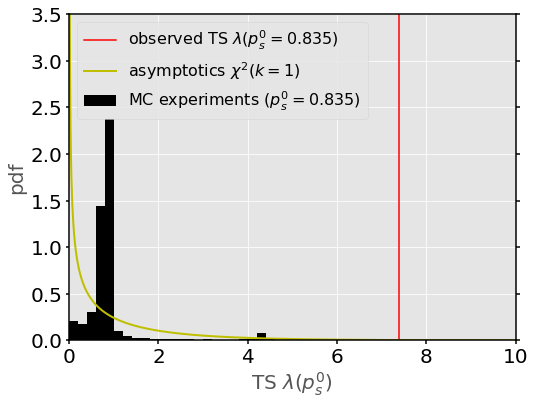

signal prob: 0.845 pvalue 0.0029


<Figure size 432x288 with 0 Axes>

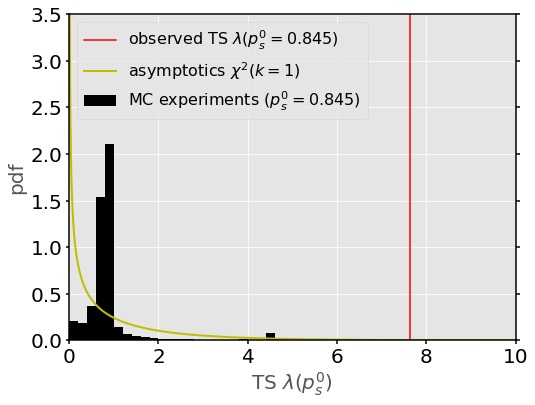

signal prob: 0.855 pvalue 0.0036


<Figure size 432x288 with 0 Axes>

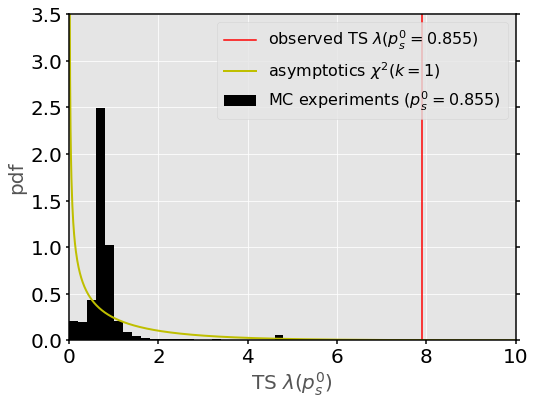

signal prob: 0.865 pvalue 0.0023


<Figure size 432x288 with 0 Axes>

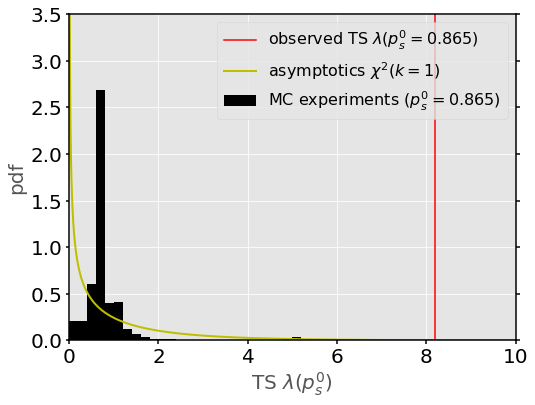

signal prob: 0.875 pvalue 0.0012


<Figure size 432x288 with 0 Axes>

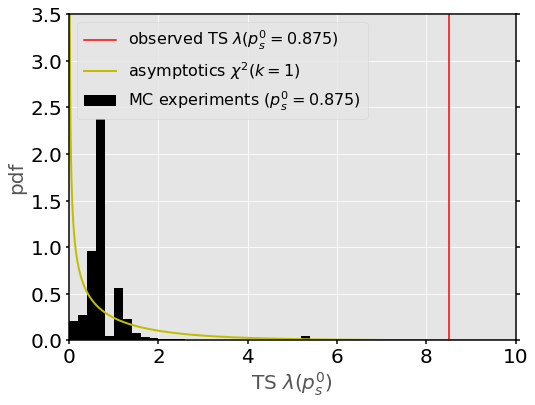

signal prob: 0.885 pvalue 0.0013


<Figure size 432x288 with 0 Axes>

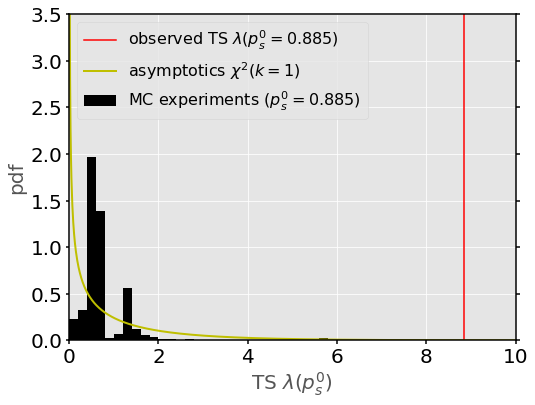

signal prob: 0.895 pvalue 0.0009


<Figure size 432x288 with 0 Axes>

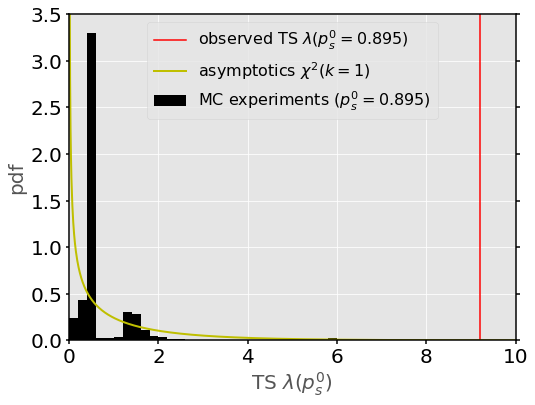

signal prob: 0.905 pvalue 0.0013


<Figure size 432x288 with 0 Axes>

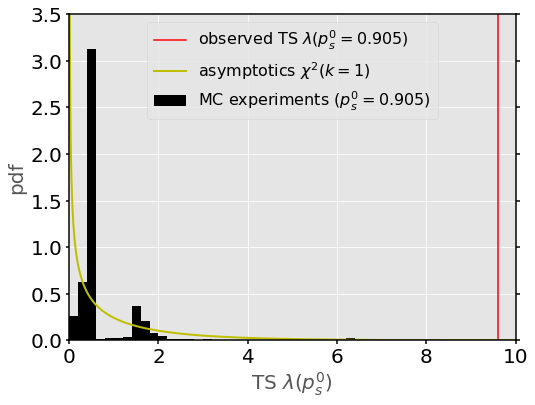

signal prob: 0.915 pvalue 0.0006


<Figure size 432x288 with 0 Axes>

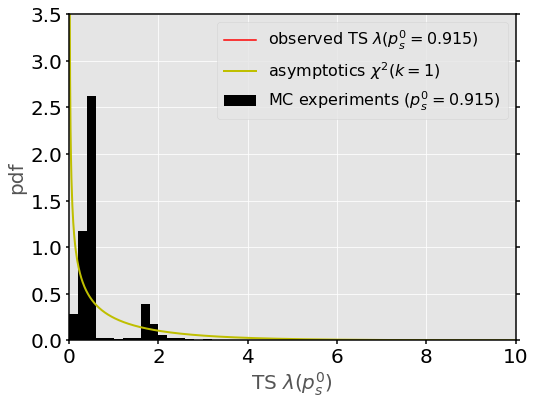

signal prob: 0.925 pvalue 0.0006


<Figure size 432x288 with 0 Axes>

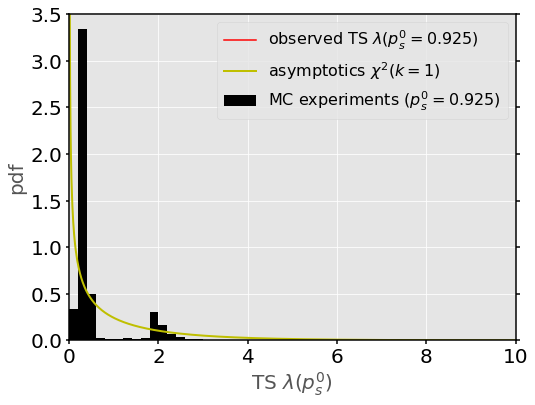

signal prob: 0.935 pvalue 0.0007


<Figure size 432x288 with 0 Axes>

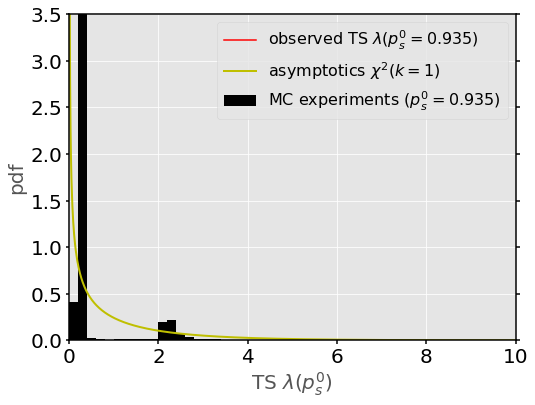

signal prob: 0.9450000000000001 pvalue 0.0


<Figure size 432x288 with 0 Axes>

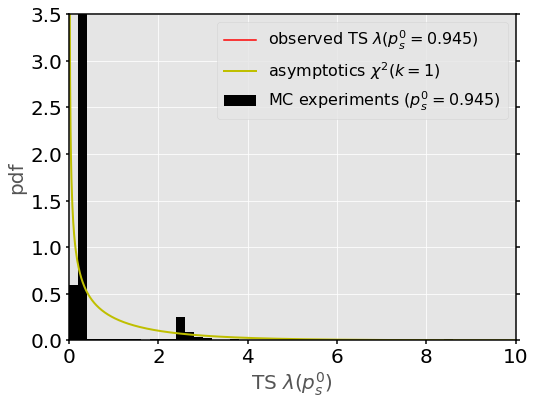

signal prob: 0.9550000000000001 pvalue 0.0


<Figure size 432x288 with 0 Axes>

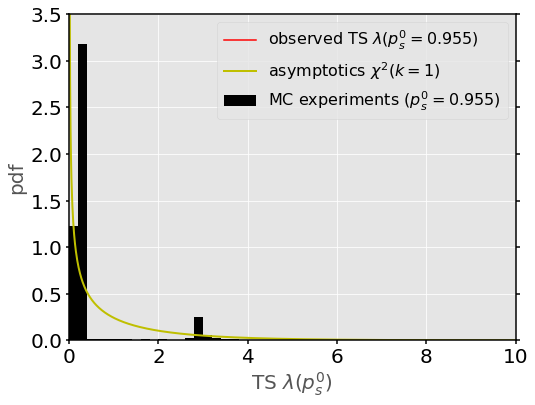

signal prob: 0.965 pvalue 0.0004


<Figure size 432x288 with 0 Axes>

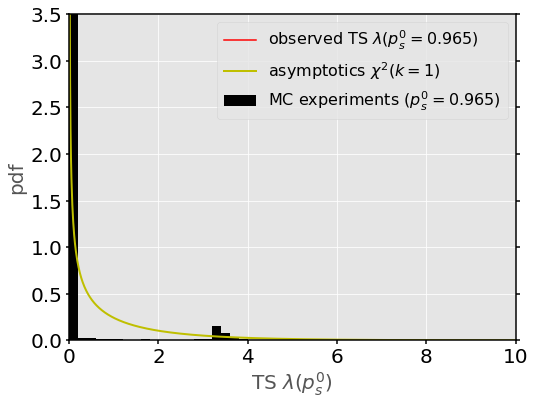

signal prob: 0.975 pvalue 0.0


<Figure size 432x288 with 0 Axes>

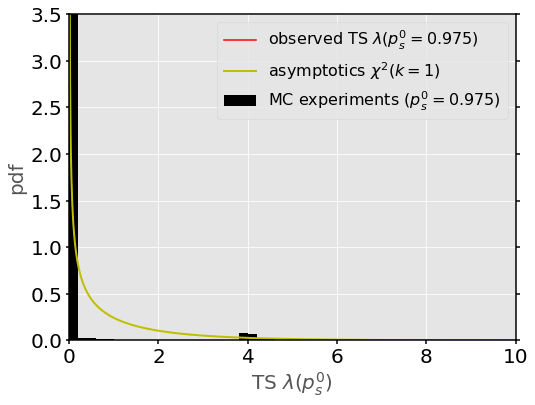

signal prob: 0.985 pvalue 0.0


<Figure size 432x288 with 0 Axes>

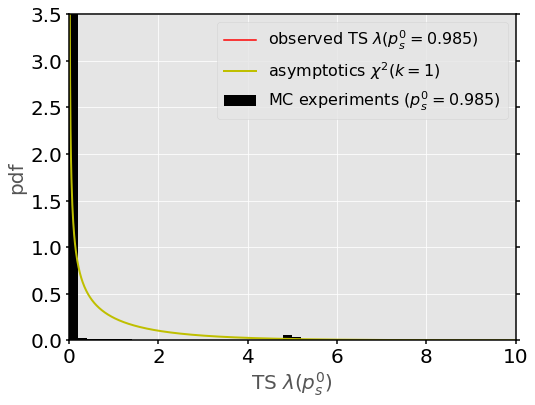

signal prob: 0.995 pvalue 0.0


<Figure size 432x288 with 0 Axes>

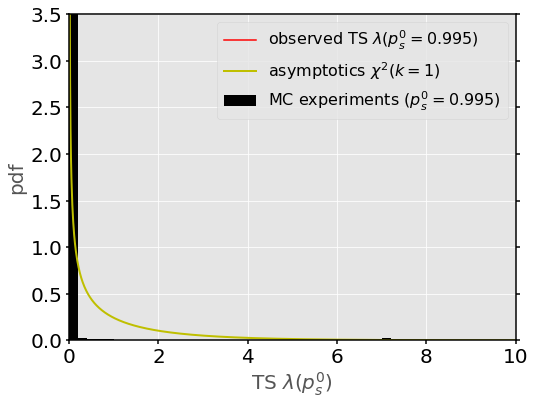

<Figure size 432x288 with 0 Axes>

In [6]:
# visualize the TS distributions
# note that for large samples we observe asymptotic behavior (i.e. chisq) throughout most of the parameterspace
# however near the boundaries ps-> 0 (or 1) convergence of the TS dist. is very slow and the distribution 
# will not be chisq. This is not a problem for the method (by construction) - but might introduce some conservatism, 
# in that coverage might be larger than nominal (but never smaller!)

from scipy.stats import chi2
for obj in zip(ps_grid, TS_grid, obsts_grid, pvals_grid):
    tps, TSdist, obsTS, pval = obj
    print "signal prob:", tps, "pvalue", pval
    edges = np.linspace(0,10, 51)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    plt.hist(TSdist, bins=edges, density=True, label="MC experiments ($p_s^0=%.3f$)" %(tps), color='k')
    plt.axvline(x=obsTS, color='r', label="observed TS $\lambda(p_s^0=%.3f)$" %(tps))
    xvals = np.linspace(0.0, 10.0, 1000)
    yvals = chi2.pdf(xvals, 1)
    plt.plot(xvals, yvals, "y-", label="asymptotics $\chi^2(k=1)$", linewidth=2)
    ax.set_ylabel('pdf', fontsize=20)
    ax.set_xlabel('TS $\lambda(p_s^0)$', fontsize=20)
    for axis in ['top','bottom','left','right']:
              ax.spines[axis].set_linewidth(1.5)
              ax.spines[axis].set_color('0.0')
        
    ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
    ax.yaxis.set_ticks_position('both')
    plt.xlim([0.0, 10.0])
    plt.ylim([0.0, 3.5])
    plt.legend(fontsize=16)

    plt.show()
    plt.clf()

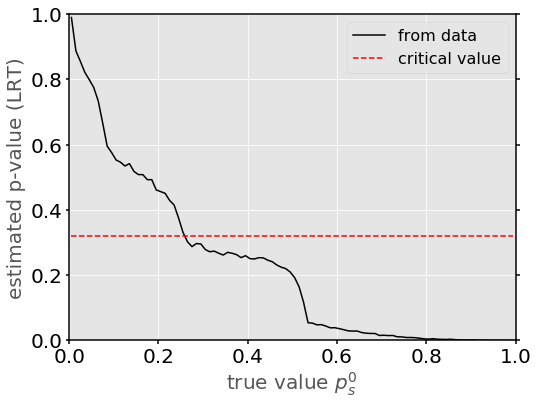

In [7]:
# since we have the pvalues as function of each point in the parameterspace
# lets visualize it
# the confidence interval is given by the set of ps-values that satisfy p-value > 0.32 (which is the critical value)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(ps_grid, pvals_grid, "k-", label="from data")
yvals = np.ones(len(ps_grid))*0.32
ax.plot(ps_grid, yvals, "r--", label="critical value")

ax.set_ylabel('estimated p-value (LRT)', fontsize=20)
ax.set_xlabel('true value $p_s^0$', fontsize=20)
for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(1.5)
          ax.spines[axis].set_color('0.0')
    
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
ax.yaxis.set_ticks_position('both')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(fontsize=16)

In [8]:
# calculate the interval from the plot above

pvals_grid = np.asarray(pvals_grid)
idx = np.where(pvals_grid >= 0.32)[0] # everything that is accepted

rejected_points = np.delete(ps_grid, idx)

# find points
lower_bound = 0.0
upper_bound = 1.0
idx = np.where(rejected_points<ps_best)[0]
if len(idx)>0:
    lower_bound =  np.amax(rejected_points[idx])

idx = np.where(rejected_points>ps_best)[0]
if len(idx)>0:
    upper_bound = np.amin(rejected_points[idx])
    
print "the 68% CL confidence interval is [", lower_bound, ",", upper_bound, "]"
print "the best fit is", ps_best

the 68% CL confidence interval is [ 0.0 , 0.265 ]
the best fit is 0.0


In [9]:
# now we study coverage.
# repeat interval construction for an ensemble of toy experiments
# we can re-use the TS distributions that were calculated in the previous steps

# we record how often a given true point is rejected from the interval.

ndatasets = 1000
coverage = []
for obj in zip(ps_grid, TS_grid):
    ps_true, TS_dist = obj
    result = []
    for i in range(ndatasets):
        pseudo_data = BuildDataset(sample_size, ps_true)
        obs_pseudo_ts = get_TS(pseudo_data, ps_true) 
        pseudo_p = get_approx_pvalue(TS_dist, obs_pseudo_ts) 
        if pseudo_p < 0.32:
            result.append(1)
        else:
            result.append(0)
            
    result = np.asarray(result)
    idx = np.where(result>0.5)[0]
    coverage.append(len(result[idx])*1.0 / len(result))
coverage = 1.-np.asarray(coverage)

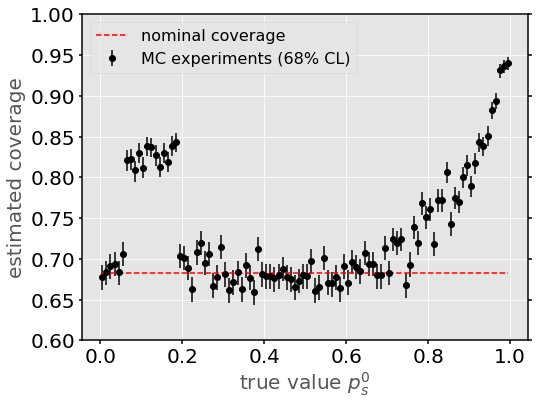

In [10]:
# visualize the coverage. see the example of the pivotal confidence interval for the normal mean
# in the other notebook

# we find coverage consistent with the minimial coverage desired, i.e. >=68%

from statsmodels.stats.proportion import proportion_confint
coverage_err_low = []
coverage_err_high = []
for tcov in coverage:
    lower, upper = proportion_confint(int(tcov * ndatasets), ndatasets, alpha=0.32, method='beta')
    coverage_err_low.append(tcov - lower)
    coverage_err_high.append(upper - tcov)

# plot only every second experiment. 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.errorbar(ps_grid, coverage, yerr=[coverage_err_low, coverage_err_high], fmt='o', color='k', label="MC experiments (68% CL)")
plt.plot(ps_grid, np.ones(len(ps_grid))*0.683, "r--", label="nominal coverage")

ax.set_xlabel('true value $p_s^0$', fontsize=20)
ax.set_ylabel('estimated coverage', fontsize=20)
for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(1.5)
          ax.spines[axis].set_color('0.0')
    
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
ax.yaxis.set_ticks_position('both')
plt.ylim([0.6, 1.0])
plt.legend(fontsize=16)

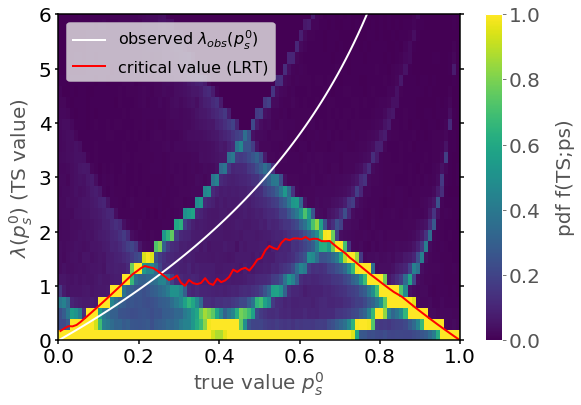

In [11]:
# this plot summarizes the method.

# interval construction through inversion of likelihood raio tests

# ingredients: 
# 1) observed data -> observed TS values as function of assumed true parameters (white)
# 2) TS distribution as function of hypothetical true value (colormap)
# 3) critical values as function of hypothetical true value (red)

# 4) the confidence interval is given by all points for which the white curve is below the red curve
# i.e. all points that are not rejected by the set of hypothesis tests

# note: for sufficiently large samples (asymptotics), when the TS distributions are chisq(k=1)
# this reduces to finding the intersection points of the lambda=-2log L0/L1 function with y=1.
# (which are very popular! - but require asymptotics to hold)

import matplotlib as mpl
vmin,vmax = 0.0, 1.0
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
ax.plot(ps_grid, obsts_grid, 'w-', label='observed $\lambda_{obs}(p_s^0)$', linewidth=2)

crit_vals = [np.percentile(ts, 68, interpolation='higher') for ts in TS_grid]
ax.plot(ps_grid, crit_vals, "r-", linewidth=2, label="critical value (LRT)")

edges_y = np.linspace(0, 10, 50)
weights = []
for ts in TS_grid:
    counts, _ = np.histogram(ts, bins=edges_y, density=True)
    weights.append(counts)
    
weights = np.asarray(weights)    

im = ax.pcolormesh(ps_edges, edges_y, weights.T, norm=norm)
ax.set_ylim([0,6])

ax.set_xlabel('true value $p_s^0$', fontsize=20)
ax.set_ylabel('$\lambda(p_s^0)$ (TS value)', fontsize=20)
for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(1.5)
          ax.spines[axis].set_color('0.0')
    
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
ax.yaxis.set_ticks_position('both')
ax.legend(fontsize=16)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('pdf f(TS;ps)', fontsize=20)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.tick_params(labelsize=20)

In [12]:
# let's look at the power function for some p_s value (compare to normal power function)
# here we look at power corresponding to 1 sigma, i.e. p<0.32
data_ps = np.linspace(0.0,1.0,40)

k=10
true_ps = ps_grid[k]
print true_ps
TSdist = TS_grid[k]


powers = []
for dps in data_ps:
    rejected = []
    for i in range(1000):
        pseudo_data = BuildDataset(sample_size, dps)
        obsts = get_TS(pseudo_data, true_ps)
        pval = get_approx_pvalue(TSdist, obsts)
        if pval<0.32:
            rejected.append(1)
        else:
            rejected.append(0)
            
    rejected = np.asarray(rejected)
    idx = np.where(rejected>0.5)[0]
    powers.append(len(rejected[idx])*1.0/len(rejected))

0.10500000000000001


(0.0, 1.0)

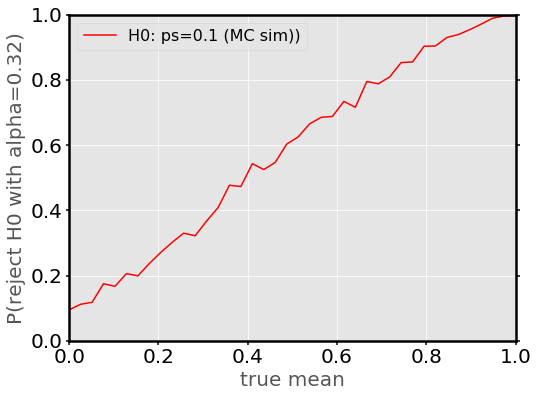

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
plt.plot(data_ps, powers, "r-", label='H0: ps=0.1 (MC sim))')
plt.ylim([0, 1.0])
ax.set_xlabel('true mean', fontsize=20)
ax.set_ylabel('P(reject H0 with alpha=0.32)', fontsize=20)
for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(2.5)
          ax.spines[axis].set_color('0.0')
    
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
ax.yaxis.set_ticks_position('both')
plt.legend(fontsize=16)
plt.xlim([0.0, 1.0])

In [14]:
# let's look at the power function for some p_s value (compare to normal power function)
# here we look at power corresponding to 1 sigma, i.e. p<0.32
data_ps = np.linspace(0.0,1.0,40)

power_funs = []
for obj in zip(ps_grid[::10], TS_grid[::10]):
    true_ps, TSdist = obj
    print true_ps
    powers = []
    for dps in data_ps:
        rejected = []
        for i in range(1000):
            pseudo_data = BuildDataset(sample_size, dps)
            obsts = get_TS(pseudo_data, true_ps)
            pval = get_approx_pvalue(TSdist, obsts)
            if pval<0.32:
                rejected.append(1)
            else:
                rejected.append(0)
                
        rejected = np.asarray(rejected)
        idx = np.where(rejected>0.5)[0]
        powers.append(len(rejected[idx])*1.0/len(rejected))
    power_funs.append(powers)

0.005
0.10500000000000001
0.20500000000000002
0.305
0.405
0.505
0.605
0.7050000000000001
0.805
0.905


(0.0, 1.0)

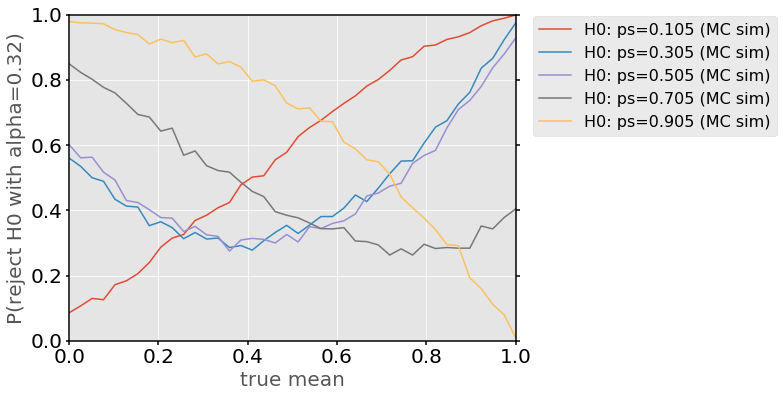

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

counter = 1
for obj in zip(ps_grid[::10], power_funs):
    true_ps, powers = obj
    if counter%2==0:
        plt.plot(data_ps, powers, label='H0: ps=%.3f (MC sim)' %(true_ps))
    counter+=1
    
plt.ylim([0, 1.0])
ax.set_xlabel('true mean', fontsize=20)
ax.set_ylabel('P(reject H0 with alpha=0.32)', fontsize=20)
for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(1.5)
          ax.spines[axis].set_color('0.0')
    
ax.tick_params(axis='both', which='both', width=1.5, colors='0.0', labelsize=20)
ax.yaxis.set_ticks_position('both')
legend = ax.legend(bbox_to_anchor=[1.02, 1.02], loc='upper left', prop={'size':16}, ncol=1, fancybox=True, frameon=True)
plt.xlim([0.0, 1.0])